<a href="https://colab.research.google.com/github/joaochenriques/IST---Marine-Currents-and-Tidal-Energy/blob/main/Tidal_Stream/BladeElementMethod/BladeDesign_V06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import subprocess
import pandas as pd
import pathlib
import numpy as np
from scipy.optimize import minimize, root_scalar

def cmdcall( cmd, verbose = False ):
    output = subprocess.getoutput( cmd )
    if verbose: print(output)

if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import matplotlib.pyplot as mpl
import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [87]:
rad2deg = 180/np.pi
deg2rad = np.pi/180

λ_hub = 1.4
λ_tip = 7.0
dλ = 0.1
n = int( ( λ_tip - λ_hub ) / dλ ) + 2
λ_vec = np.linspace( λ_hub, λ_tip, n )

a_vec = np.zeros_like( λ_vec )
ap_vec = np.zeros_like( λ_vec )
ϕ_vec = np.zeros_like( λ_vec )
Zc_vec = np.zeros_like( λ_vec )
CP_vec = np.zeros_like( λ_vec )
CP = 0.0
λ_vec

array([1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. ])

## Glauert optimal distribution

C_P = 0.5608


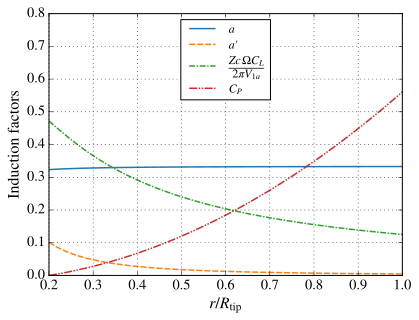

In [88]:
def f(y):
    return -64/5 * y**5 - 72 * y**4 - 124 * y**3 - 38 * y**2 + 63 * y + 12 * np.log(y) + 4 / y

def Integral_f( y2, y1, λ_tip ):
    return 8 / ( 729 * λ_tip**2 ) * ( f(y2) - f(y1) )

for i, λ in enumerate( λ_vec ):

    func = lambda a: 16 * a**3 - 24 * a**2 + 3 * ( 3 - λ**2 ) * a + ( λ**2 - 1 )
    a = root_scalar(func, bracket=[ 1.0/4.0, 1.0/3.0 ], method='brentq' ).root
    ap = ( 1.0 - 3 * a ) / ( 4 * a - 1 )

    ϕ = np.arctan( ( 1 - a ) / ( 1 + ap ) / λ )
    Zc  = 4.0 * ap * λ**2 / np.sqrt( ( 1.0 - a )**2 + ( 1.0 + ap )**2 * λ**2 )

    a_vec[i] = a
    ap_vec[i] = ap
    ϕ_vec[i] = ϕ
    Zc_vec[i] = Zc

    if i > 0:
        CP_vec[i] = CP = CP + Integral_f( 1 - 3*a_vec[i], 1 - 3*a_vec[i-1], λ_tip )
    else:
        CP = 0.0

x_vec = λ_vec / λ_tip

mpl.plot( x_vec, a_vec,  label = r"$a$" )
mpl.plot( x_vec, ap_vec, label = r"$a\prime$" )
mpl.plot( x_vec, Zc_vec, label = r"$\dfrac{Zc\,\Omega C_L}{2\pi V_{1a}}$" )
mpl.plot( x_vec, CP_vec, label = r"$C_P$" )

mpl.xlabel( r"$r/R_\mathrm{tip}$")
mpl.ylabel( "Induction factors")
mpl.legend( loc="upper center", fontsize=12, handlelength=2.8, \
            labelspacing=0.4 )
mpl.grid()
mpl.ylim( ( 0.0, 0.8 ) )
mpl.savefig( "InductionFactors.pdf" )
print( f"C_P = {CP_vec[-1]:.4f}" )

In [89]:
df = pd.DataFrame( { r"$\lambda$": λ_vec,
                     r"$a$": a_vec,
                     r"$a'$": ap_vec,
                     r"$\phi$": ϕ_vec*rad2deg,
                     r"$C_P$": CP_vec,
                     r"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$": Zc_vec
                    } )

# print( df.to_latex(index=False,
#        formatters=["{:.2f}".format,"{:.5f}".format,"{:.5f}".format, \
#                    "{:.2f}".format,"{:.3f}".format,"{:.4f}".format]
# ))
df

,$\lambda$,$a$,$a'$,$\phi$,$C_P$,"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$"
0,1.4,0.323411,0.101366,23.691785,0.000000,0.471967
1,1.5,0.324456,0.089419,22.460045,0.003201,0.455123
2,1.6,0.325353,0.079432,21.336922,0.006657,0.438676
3,1.7,0.326126,0.071003,20.310363,0.010368,0.422782
4,1.8,0.326798,0.063828,19.369736,0.014332,0.407535
5,1.9,0.327383,0.057672,18.505694,0.018550,0.392980
6,2.0,0.327896,0.052354,17.710034,0.023020,0.379134
7,2.1,0.328347,0.047730,16.975563,0.027742,0.365993
8,2.2,0.328747,0.043685,16.295970,0.032714,0.353540
9,2.3,0.329101,0.040128,15.665710,0.037937,0.341748


## Computing the turbine blade (Glauert's solution)

In [90]:
def airfoil_data( α, Wm = None ):
    α *= rad2deg
    CL = 0.368 + 0.094 * α
    CD = 0.00994 + 0.000259 * α + 0.0001055 * α**2
    return CL, CD

In [91]:
V1a = 2.5
Ω = 24.0 * np.pi / 30.0
Z = 3

α  = 6.09 * deg2rad
CL, CD = airfoil_data( α )
Zc_factor = 2.0 * np.pi * V1a / ( Z * Ω * CL )
CL, CD

(0.94046, 0.01543010455)

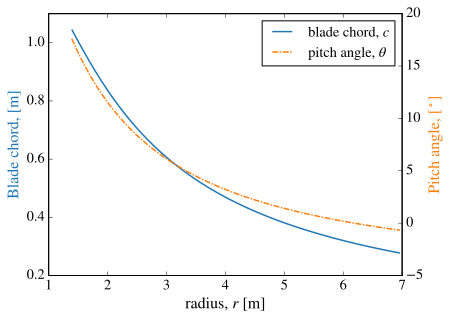

In [92]:
θ_vec = ϕ_vec - α
r_vec = λ_vec * V1a / Ω
c_vec = Zc_vec * Zc_factor

ax1 = mpl.gca()
ax1.plot( r_vec, c_vec, mut.linecolors[0], label="blade chord, $c$" )
ax1.set_ylabel( "Blade chord, [m]", color=mut.linecolors[0] )
ax1.set_xlabel( r"radius, $r$ [m]")
ax2 = mpl.gca().twinx()
ax2.plot( r_vec, np.array( θ_vec ) * rad2deg, mut.linecolors[1], \
          dashes=mut.linestyles[2], label=r'pitch angle, $\theta$' )
ax2.tick_params(axis='y' )
ax2.set_ylabel( "Pitch angle, [$^\circ$]", color=mut.linecolors[1] )

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right' )

mpl.savefig( "TurbineDesign.pdf" )

In [93]:
def tip_loss( a, ap, ϕ, λ, λtip ):
    ff = 0.5 * Z * ( λtip / λ - 1 ) / np.sin( ϕ ) # np.sqrt( 1 + ( λ / (1-a) )**2 )
    rr =  np.max( ( 2.0 / np.pi * np.arccos( np.exp( -ff ) ), 1E-3 ) )
    # rr = 1
    return rr

1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
0 0.32341143564788866 0.3237583656881051 0.10136599561648167 0.09727278953961561
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
1 0.32445622144786823 0.3247801561250818 0.08941944386420979 0.08561676364496362
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
2 0.3253527638856201 0.3256566206934587 0.07943208420158754 0.07588155578229744
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
3 0.32612640833164547 0.32641261188496584 0.07100287363772807 0.06767316002832946
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
4 0.3267975955201298 0.3270681952746339 0.06382756291657345 0.060692769549898315
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
5 0.327382889959931 0.32763964872256224 0.05767208400154888 0.05471058513780128
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+00 
6 0.32789578342988007 0.3281402462086647 0.05235408449625549 0.04954764555418304
1.0000E+00 1.0000E+00 1.0000E+00 1.0000E+0

<ipython-input-93-c407bb54d1f6>:2: RuntimeWarning: invalid value encountered in scalar divide
  ff = 0.5 * Z * ( λtip / λ - 1 ) / np.sin( ϕ ) # np.sqrt( 1 + ( λ / (1-a) )**2 )


C_P = 2.8038


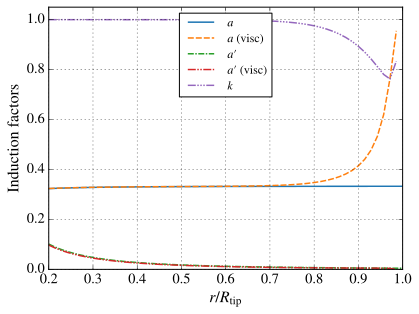

In [94]:
visc_a_vec = a_vec.copy()
visc_ap_vec = ap_vec.copy()
visc_ϕ_vec = ϕ_vec.copy()
visc_Zc_vec = Zc_vec.copy()
visc_θ_vec = θ_vec.copy()
visc_c_vec = c_vec.copy()
visc_CP_vec = CP_vec.copy()
visc_k_vec = np.zeros_like( visc_a_vec )
visc_CP = 0.0

for i, λ in enumerate( λ_vec ):

    for k in range( 5 ):
        ϕ = visc_ϕ_vec[i]
        cosϕ = np.cos( ϕ )
        sinϕ = np.sin( ϕ )

        a = visc_a_vec[i]
        ap = visc_ap_vec[i]
        k = tip_loss( a, ap, ϕ, λ, λ_vec[-1] )
        print( f'{k:.4E}', end=' ' )

        σ = Z * visc_c_vec[i] / ( 2 * np.pi * r_vec[i] )
        Ca = CL * cosϕ + CD * sinϕ
        Ct = CL * sinϕ - CD * cosϕ

        a  = σ * Ca / ( 4 * k * sinϕ**2 + σ * Ca )
        ap = σ * Ct / ( 4 * k * sinϕ*cosϕ - σ * Ct )
        ϕ = np.arctan( ( 1 - a ) / ( 1 + ap ) / λ )

        visc_a_vec[i] = a
        visc_ap_vec[i] = ap
        visc_ϕ_vec[i] = ϕ
        visc_k_vec[i] = k
        # Zc_vec[i] = Zc

        if i > 0:
            CP_vec[i] = CP = CP + Integral_f( 1 - 3*a_vec[i], 1 - 3*a_vec[i-1], λ_tip )
        else:
            CP = 0.0
    print()
    print( i, a_vec[i], visc_a_vec[i], ap_vec[i], visc_ap_vec[i] )

x_vec = λ_vec / λ_tip

mpl.plot( x_vec, a_vec,  label = r"$a$" )
mpl.plot( x_vec, visc_a_vec,  label = r"$a$ (visc)" )
mpl.plot( x_vec, ap_vec, label = r"$a\prime$" )
mpl.plot( x_vec, visc_ap_vec, label = r"$a\prime$ (visc)" )
# mpl.plot( x_vec, Zc_vec, label = r"$\dfrac{Zc\,\Omega C_L}{2\pi V_{1a}}$" )
# mpl.plot( x_vec, CP_vec, label = r"$C_P$" )
mpl.plot( x_vec, visc_k_vec, label = r"$k$" )

mpl.xlabel( r"$r/R_\mathrm{tip}$")
mpl.ylabel( "Induction factors")
mpl.legend( loc="upper center", fontsize=12, handlelength=2.8, \
            labelspacing=0.4 )
mpl.grid()
mpl.ylim( ( 0.0, 1.05 ) )
mpl.savefig( "InductionFactors.pdf" )
print( f"C_P = {CP_vec[-1]:.4f}" )

In [96]:
df = pd.DataFrame( { r"$\lambda$": λ_vec,
                     r"$a$": visc_a_vec,
                     r"$a'$": visc_ap_vec,
                     r"$\phi$": visc_ϕ_vec*rad2deg,
                    #  r"$C_P$": CP_vec,
                     r"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$": Zc_vec
                    } )

# print( df.to_latex(index=False,
#        formatters=["{:.2f}".format,"{:.5f}".format,"{:.5f}".format, \
#                    "{:.2f}".format,"{:.3f}".format,"{:.4f}".format]
# ))
df

,$\lambda$,$a$,$a'$,$\phi$,"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$"
0,1.4,0.323758,0.097273,23.759543,0.471967
1,1.5,0.324780,0.085617,22.521141,0.455123
2,1.6,0.325657,0.075882,21.392209,0.438676
3,1.7,0.326413,0.067673,20.360568,0.422782
4,1.8,0.327068,0.060693,19.415479,0.407535
5,1.9,0.327640,0.054711,18.547505,0.392980
6,2.0,0.328140,0.049548,17.748367,0.379134
7,2.1,0.328581,0.045063,17.010808,0.365993
8,2.2,0.328971,0.041144,16.328460,0.353540
9,2.3,0.329317,0.037702,15.695735,0.341748


In [73]:
λtip = λ_vec[-1]
i = -1
λ = λ_vec[i]
ϕ = ϕ_vec[i]
a = a_vec[i]
ap = visc_ap_vec[i]
ff = 0.5 * Z * ( λtip / λ - 1 ) / np.sin( ϕ ) # np.sqrt( 1 + ( λ / (1-a) )**2 )
rr = 2.0 / np.pi * np.arccos( np.exp( -ff ) )
ff, rr

(np.float64(0.0), np.float64(0.0))

Total Thrust: 47.47 N
Total Torque: 3.48 Nm
Power: 347.81 W


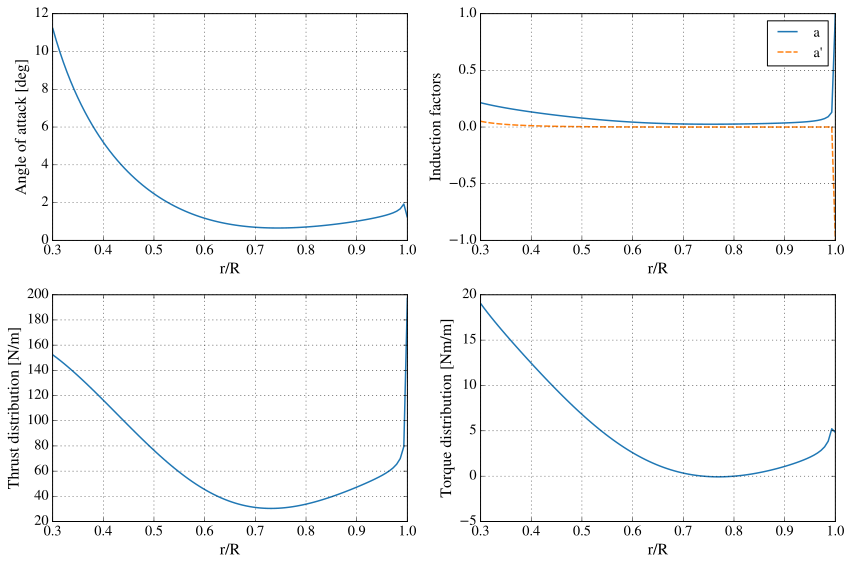

In [82]:
import matplotlib.pyplot as plt

# Input parameters
R = 1.0  # Rotor radius [m]
B = 3     # Number of blades
omega = 100  # Rotational speed [rad/s]
V_inf = 10.0  # Free-stream velocity [m/s]
rho = 1.225  # Air density [kg/m^3]

# Blade geometry - assume linear twist and chord distribution
sections = 100  # Number of blade sections
r = np.linspace(0.3*R, R, sections)  # Radial positions
chord = 0.1 * (1 - 0.8*r/R)  # Chord distribution [m]
theta = np.deg2rad(15 * (1 - 0.7*r/R))  # Twist distribution [rad]

# Airfoil properties (simplified)
a0 = 2*np.pi  # Lift curve slope [1/rad]
alpha0 = 0.0  # Zero-lift angle of attack [rad]
Cd0 = 0.01    # Profile drag coefficient

# Initialize arrays
a = np.zeros(sections)       # Axial induction factor
ap = np.zeros(sections)      # Tangential induction factor
alpha = np.zeros(sections)   # Angle of attack
phi = np.zeros(sections)     # Flow angle
Cl = np.zeros(sections)     # Lift coefficient
Cd = np.zeros(sections)     # Drag coefficient
F = np.zeros(sections)      # Prandtl's tip loss factor
dT = np.zeros(sections)     # Thrust for each element
dQ = np.zeros(sections)     # Torque for each element

# BEM iteration
tolerance = 1e-5
max_iter = 100

for i in range(sections):
    # Initial guess
    a[i] = 0.3
    ap[i] = 0.0

    for _ in range(max_iter):
        # Flow angle
        phi[i] = np.arctan((V_inf*(1 + a[i])) / (omega*r[i]*(1 - ap[i])))

        # Angle of attack
        alpha[i] = phi[i] - theta[i]

        # Lift and drag coefficients
        Cl[i] = a0 * (alpha[i] - alpha0)
        Cd[i] = Cd0 + 0.01 * alpha[i]**2  # Simple drag model

        # Tip loss factor (Prandtl)
        f_tip = (B/2) * (R - r[i]) / (r[i] * np.abs(np.sin(phi[i])))
        F_tip = (2/np.pi) * np.arccos(np.exp(-f_tip))

        f_root = (B/2) * (r[i] - 0.2*R) / (r[i] * np.abs(np.sin(phi[i])))
        F_root = (2/np.pi) * np.arccos(np.exp(-f_root))

        F[i] = F_tip * F_root

        # Coefficients
        Cn = Cl[i] * np.cos(phi[i]) + Cd[i] * np.sin(phi[i])
        Ct = Cl[i] * np.sin(phi[i]) - Cd[i] * np.cos(phi[i])

        sigma = B * chord[i] / (2 * np.pi * r[i])  # Local solidity

        # Update axial induction factor
        a_new = 1 / (4 * F[i] * np.sin(phi[i])**2 / (sigma * Cn) + 1)

        # Update tangential induction factor
        ap_new = 1 / (4 * F[i] * np.sin(phi[i]) * np.cos(phi[i]) / (sigma * Ct) - 1)

        # Check for convergence
        if np.abs(a_new - a[i]) < tolerance and np.abs(ap_new - ap[i]) < tolerance:
            a[i] = a_new
            ap[i] = ap_new
            break

        a[i] = 0.75*a[i] + 0.25*a_new  # Relaxation factor for stability
        ap[i] = 0.75*ap[i] + 0.25*ap_new

    # Calculate forces
    W = np.sqrt((V_inf*(1 + a[i]))**2 + (omega*r[i]*(1 - ap[i]))**2)
    dL = 0.5 * rho * W**2 * chord[i] * Cl[i]
    dD = 0.5 * rho * W**2 * chord[i] * Cd[i]

    dT[i] = B * (dL * np.cos(phi[i]) + dD * np.sin(phi[i])) * (r[1] - r[0])
    dQ[i] = B * (dL * np.sin(phi[i]) - dD * np.cos(phi[i])) * r[i] * (r[1] - r[0])

# Integrate forces
T = np.sum(dT)  # Total thrust [N]
Q = np.sum(dQ)  # Total torque [Nm]
P = Q * omega   # Power [W]

# Print results
print(f"Total Thrust: {T:.2f} N")
print(f"Total Torque: {Q:.2f} Nm")
print(f"Power: {P:.2f} W")

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r/R, np.rad2deg(alpha))
plt.xlabel('r/R')
plt.ylabel('Angle of attack [deg]')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(r/R, a, label='a')
plt.plot(r/R, ap, label="a'")
plt.xlabel('r/R')
plt.ylabel('Induction factors')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(r/R, dT/(r[1]-r[0]))
plt.xlabel('r/R')
plt.ylabel('Thrust distribution [N/m]')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(r/R, dQ/(r[1]-r[0]))
plt.xlabel('r/R')
plt.ylabel('Torque distribution [Nm/m]')
plt.grid()

plt.tight_layout()
plt.show()
